# Exercise


Do your work for this exercise in a notebook named `explore`. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

---

In [3]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
def prepare():
    df = get_store_data()
    print('Data acquired...')
    print('Converting to datetime')
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index("sale_date").sort_index()
    print('Sale date set to datetime and reindexed...')
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    df['sales_total']=df.sale_amount * df.item_price
    print('Added engineered columns...')
    print('Prepare complete')
    return df

In [20]:
def prepare2(): 
    df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
    print('Read power data from CSV...')
    print('Converting date to datetime...')
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index("Date").sort_index()
    print('Dates converted and reindexed...')
    df['month'] = df.index.month
    df['year'] = df.index.year
    print('Added engineered columns...')
    print('Null value counts:')
    print(df.isnull().sum())
    print()
    print('Filling NAs...')
    #df.ffill(inplace=True)
    #df.bfill(inplace=True)
    df.fillna(0, inplace=True)
    print()
    print('Null value counts:')
    print(df.isnull().sum())
    print('Data prep complete.')
    return df

---

### Store

In [6]:
df=prepare()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete
Data acquired...
Converting to datetime
Sale date set to datetime and reindexed...


NumExpr defaulting to 8 threads.


Added engineered columns...
Prepare complete


In [7]:
df.head()

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,26.0,211817,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,27.0,832657,45,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,54.0,213643,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,7,15000 San Pedro Ave,San Antonio,8,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,35.0,215469,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,8,735 SW Military Dr,San Antonio,9,TX,78221,1,Tuesday,294.00


---

## OPS

In [21]:
df=prepare2()

Read power data from CSV...
Converting date to datetime...
Dates converted and reindexed...
Added engineered columns...
Null value counts:
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

Filling NAs...

Null value counts:
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64
Data prep complete.


In [12]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [16]:
df.Wind.value_counts()

0.000      1463
229.770       2
29.274        2
31.469        2
34.973        2
           ... 
329.651       1
263.516       1
383.741       1
118.332       1
153.288       1
Name: Wind, Length: 2914, dtype: int64

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>, <AxesSubplot:>]],
      dtype=object)

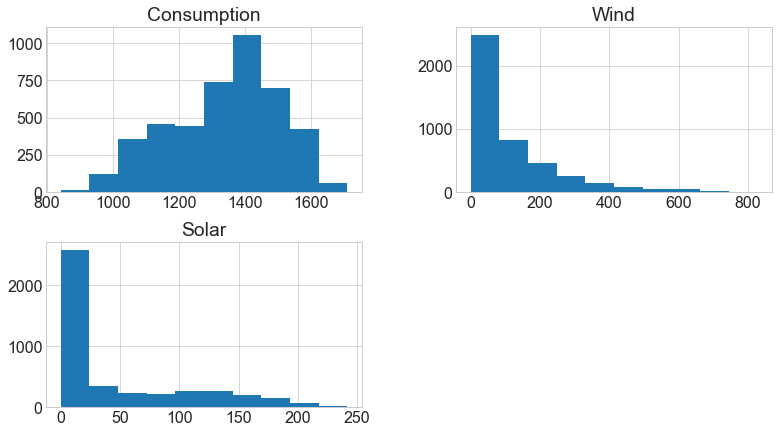

In [31]:
df[['Consumption', 'Wind', 'Solar']].hist()

In [30]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)


Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


<AxesSubplot:xlabel='Date'>

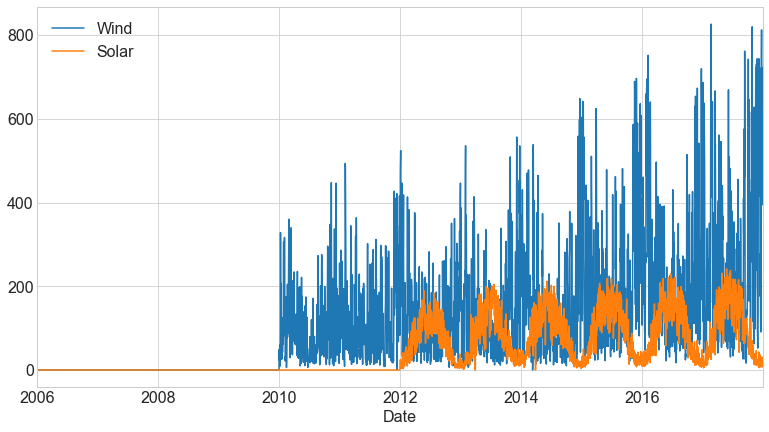

In [28]:
df[['Wind', 'Solar']].plot()

<AxesSubplot:xlabel='Date'>

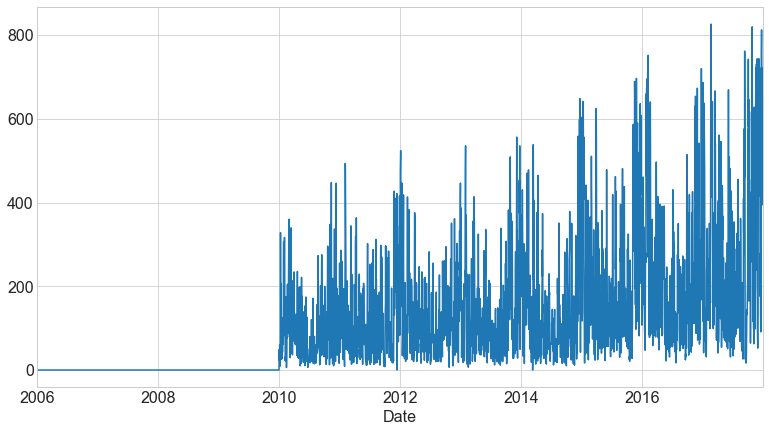

In [23]:
df.Wind.plot()

<AxesSubplot:xlabel='Date'>

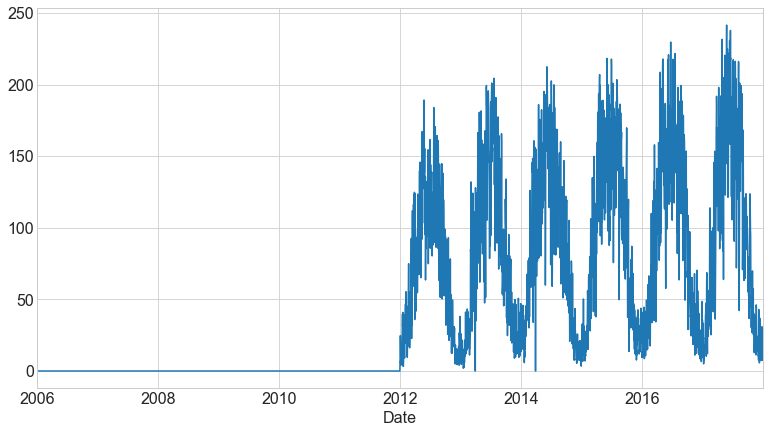

In [25]:
df.Solar.plot()

<AxesSubplot:xlabel='Date'>

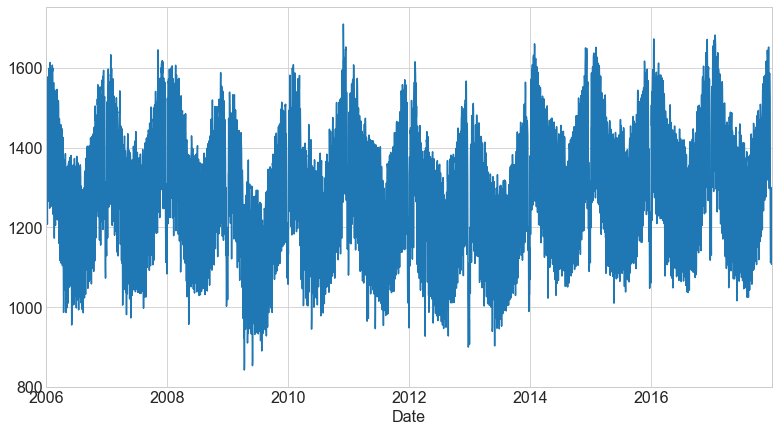

In [32]:
df.Consumption.plot()

In [34]:
#Split Data

train = df[:'2016'] # includes 2016
test = df['2017']


In [36]:
test

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2016-12-27,1289.324,640.895,23.448,664.343,12,2016
2016-12-28,1294.881,214.990,19.450,234.440,12,2016
2016-12-29,1295.897,167.698,42.910,210.608,12,2016
2016-12-30,1291.044,239.257,48.546,287.803,12,2016
2016-12-31,1212.568,315.063,34.580,349.643,12,2016


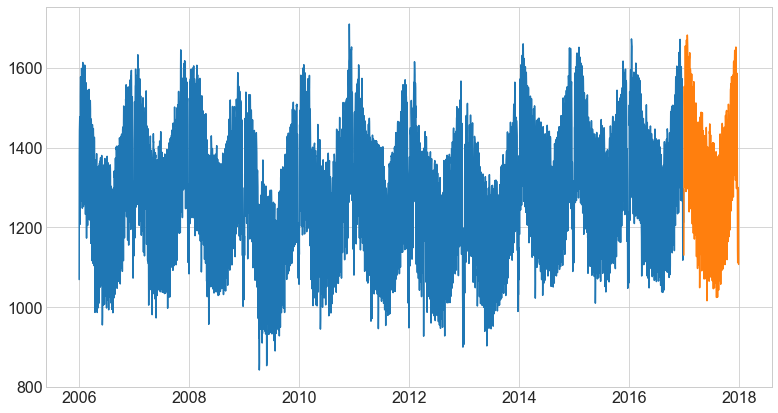

In [37]:

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [38]:
y=train.Consumption

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

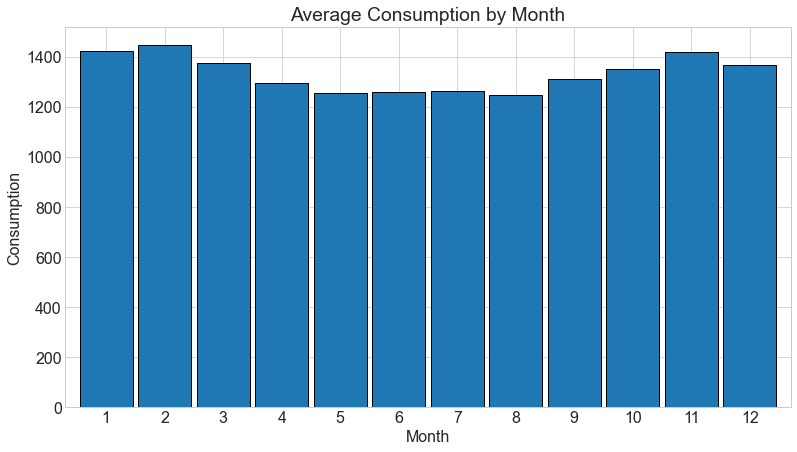

In [39]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

In [77]:
y2=train.Solar
y3=train.Wind

[Text(0.5, 1.0, 'Average Solar by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Solar')]

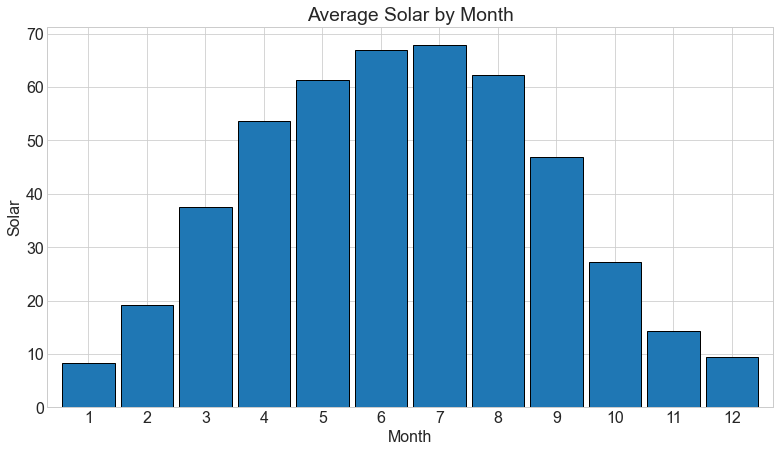

In [78]:
ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Solar by Month', xlabel='Month', ylabel='Solar')

[Text(0.5, 1.0, 'Average Wind by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Wind')]

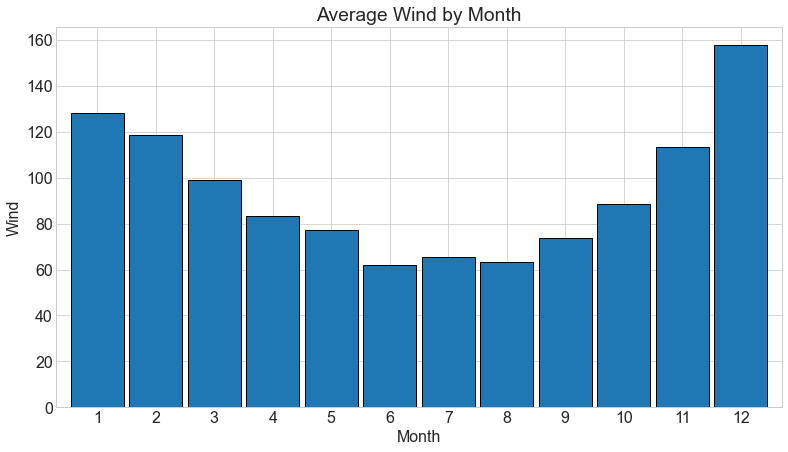

In [79]:
ax = y3.groupby(y3.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Wind by Month', xlabel='Month', ylabel='Wind')

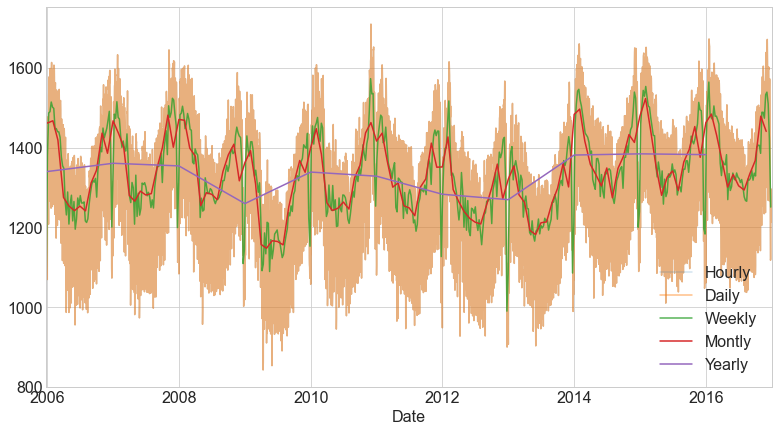

In [80]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [81]:
y2.head()

Date
2006-01-01    0.0
2006-01-02    0.0
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
Name: Solar, dtype: float64

In [82]:
train.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [83]:
y2.sample(25)

Date
2009-08-19      0.000
2015-12-06     39.065
2015-03-09    118.813
2011-01-24      0.000
2013-03-30      0.000
2013-03-22    105.826
2016-03-17    157.923
2008-11-27      0.000
2010-11-20      0.000
2010-10-02      0.000
2011-03-10      0.000
2007-10-10      0.000
2011-06-28      0.000
2008-02-18      0.000
2014-12-31      3.721
2014-10-16     40.676
2015-10-08     44.709
2016-04-05     97.348
2009-09-29      0.000
2008-11-24      0.000
2011-04-08      0.000
2007-12-29      0.000
2016-07-20    221.746
2006-02-25      0.000
2015-06-01    132.072
Name: Solar, dtype: float64

In [84]:
y2.sample(25)

Date
2010-04-21      0.000
2006-04-14      0.000
2015-12-05     37.127
2012-05-15    119.739
2015-11-24     37.328
2010-10-28      0.000
2008-01-23      0.000
2006-04-23      0.000
2010-12-26      0.000
2008-09-28      0.000
2009-07-23      0.000
2007-10-09      0.000
2008-01-05      0.000
2013-10-12     32.451
2014-09-06    128.684
2016-01-08     40.969
2013-03-27     91.094
2009-07-03      0.000
2011-10-30      0.000
2006-03-11      0.000
2010-09-11      0.000
2007-09-27      0.000
2011-12-14      0.000
2009-07-27      0.000
2015-09-15     95.003
Name: Solar, dtype: float64

In [85]:
y2.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='Date', length=4018)

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

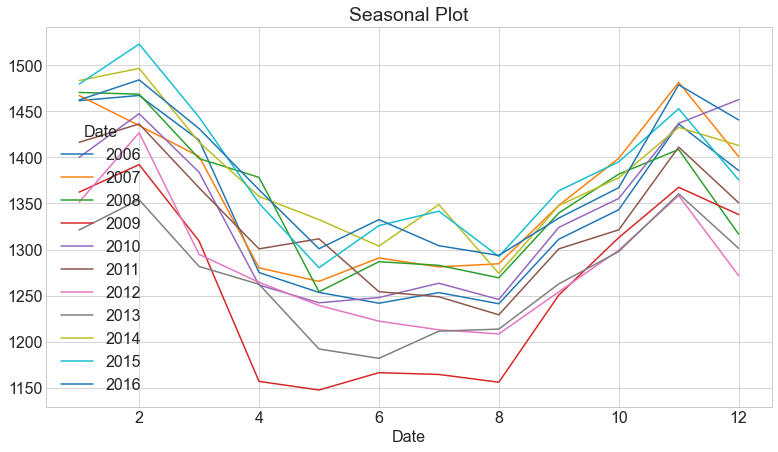

In [86]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Solar Seasonal Plot'}, xlabel='Date'>

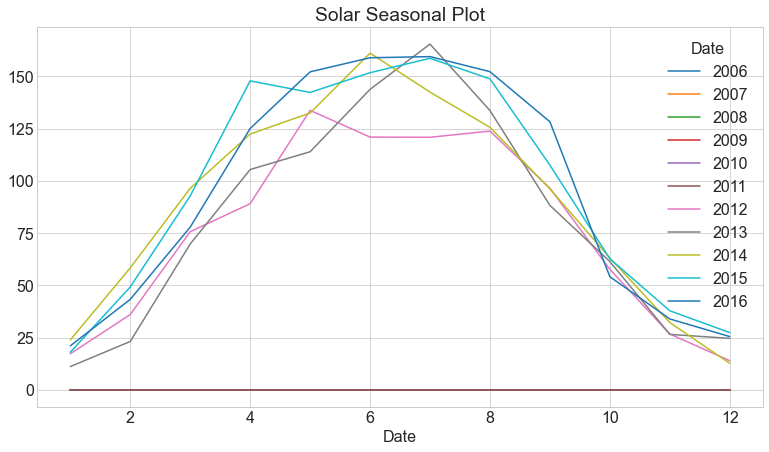

In [88]:
y2.groupby([y2.index.year, y2.index.month]).mean().unstack(0).plot(title='Solar Seasonal Plot')

<AxesSubplot:title={'center':'Wind Seasonal Plot'}, xlabel='Date'>

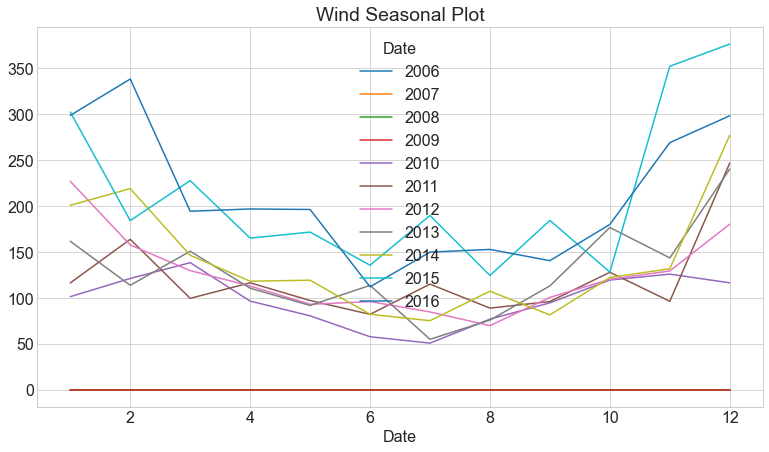

In [89]:
y3.groupby([y3.index.year, y3.index.month]).mean().unstack(0).plot(title='Wind Seasonal Plot')


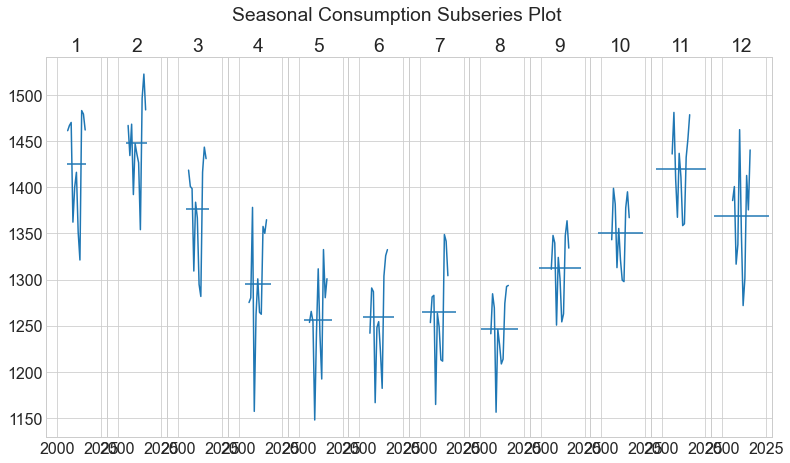

In [91]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Consumption Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

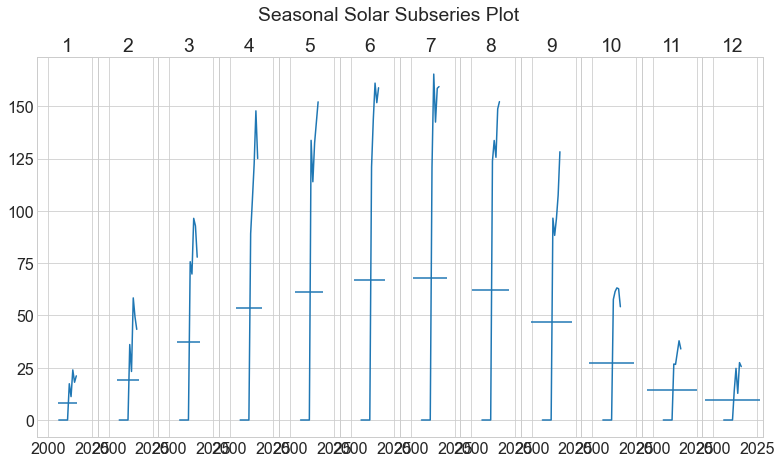

In [92]:
table = y2.groupby([y2.index.year, y2.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Solar Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

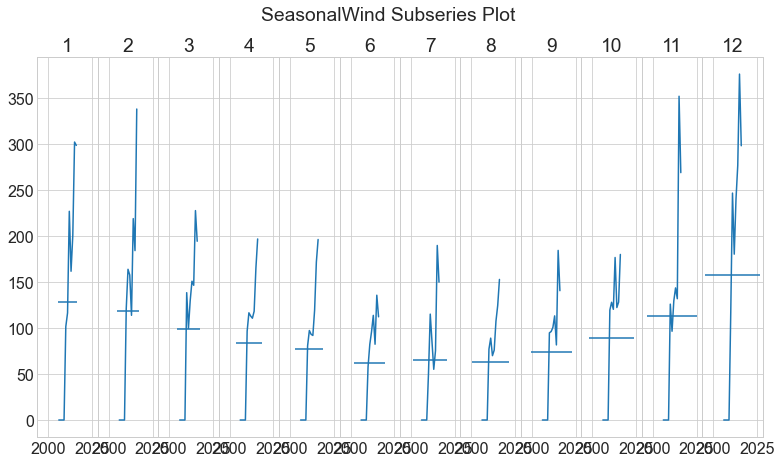

In [93]:
table = y3.groupby([y3.index.year, y3.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('SeasonalWind Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

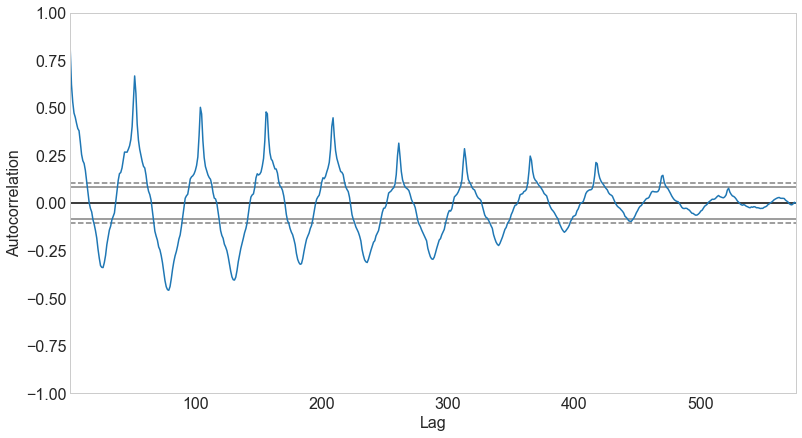

In [94]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

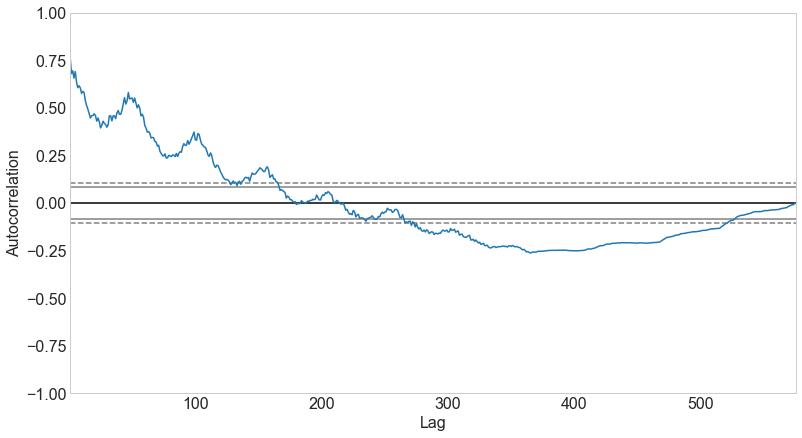

In [95]:
pd.plotting.autocorrelation_plot(train.Wind.resample('W').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

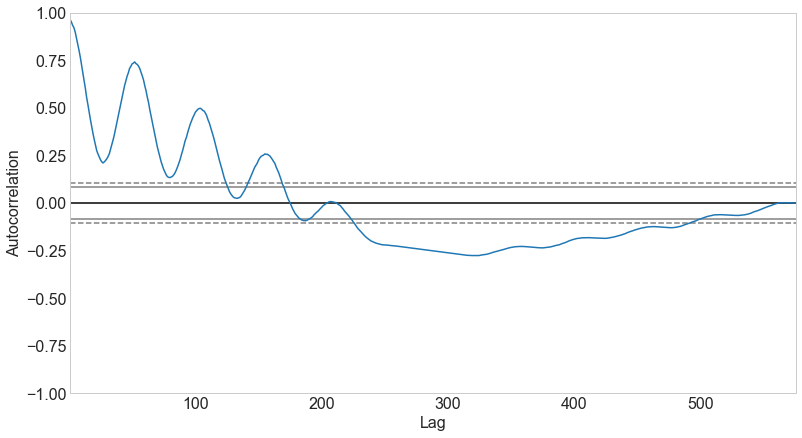

In [96]:
pd.plotting.autocorrelation_plot(train.Solar.resample('W').mean())


In [105]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-33.536583,NaN
2006-01-08,1381.300143,NaN,-151.128130,NaN
2006-01-15,1486.730286,NaN,-23.125938,NaN
2006-01-22,1490.031143,NaN,97.415793,NaN
2006-01-29,1514.176857,NaN,125.755815,NaN


<AxesSubplot:xlabel='Date'>

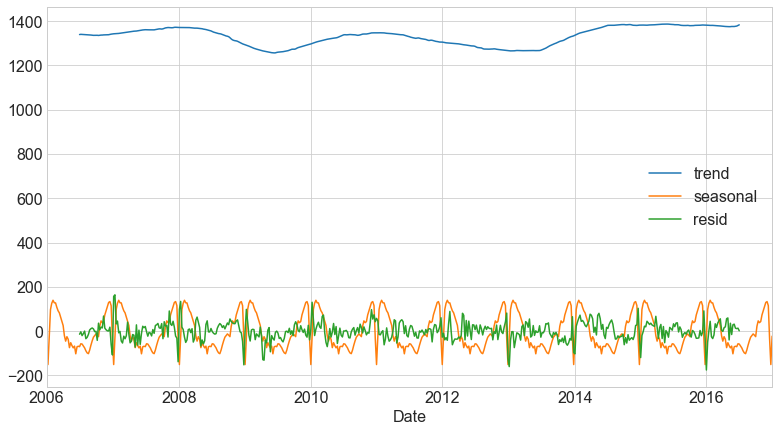

In [106]:
decomposition.iloc[:, 1:].plot()


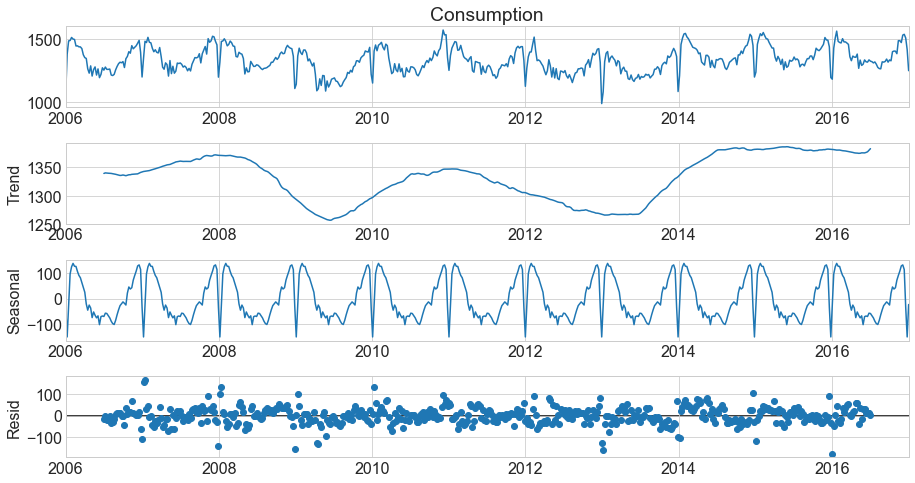

In [107]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [119]:
y2=train[train.Wind>0]


In [120]:
y2.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2010-01-01,1057.372,48.709,0.0,0.0,1,2010
2010-01-02,1161.042,24.628,0.0,0.0,1,2010
2010-01-03,1132.069,22.963,0.0,0.0,1,2010
2010-01-04,1346.250,59.318,0.0,0.0,1,2010
2010-01-05,1457.374,41.624,0.0,0.0,1,2010


In [121]:

y2 = y2.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,0.0,NaN,-31.489949,NaN
2006-01-08,0.0,NaN,-29.068403,NaN
2006-01-15,0.0,NaN,-30.702312,NaN
2006-01-22,0.0,NaN,-28.889866,NaN
2006-01-29,0.0,NaN,-30.789656,NaN


<AxesSubplot:xlabel='Date'>

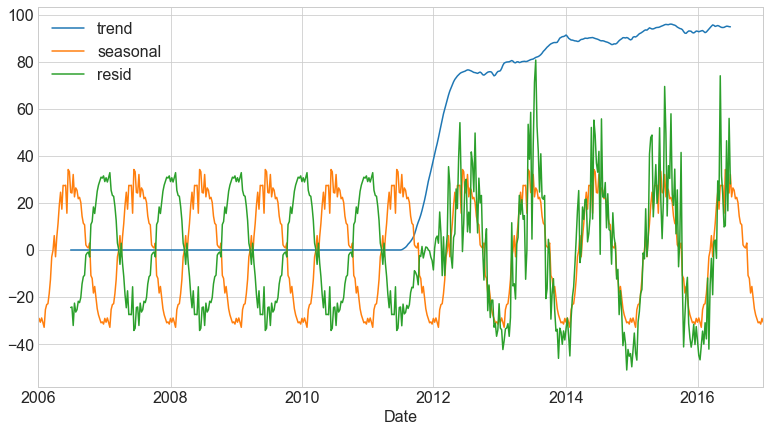

In [122]:
decomposition.iloc[:, 1:].plot()


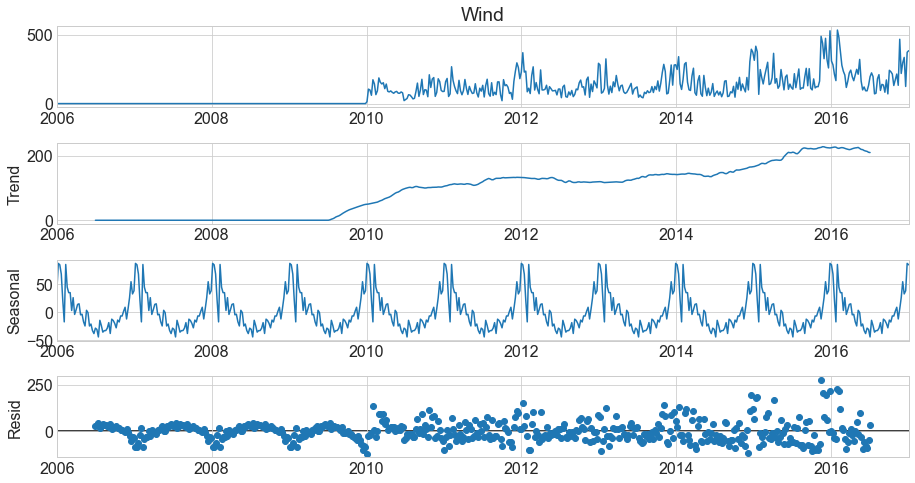

In [110]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [111]:
y = train.Solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,0.0,NaN,-31.489949,NaN
2006-01-08,0.0,NaN,-29.068403,NaN
2006-01-15,0.0,NaN,-30.702312,NaN
2006-01-22,0.0,NaN,-28.889866,NaN
2006-01-29,0.0,NaN,-30.789656,NaN


<AxesSubplot:xlabel='Date'>

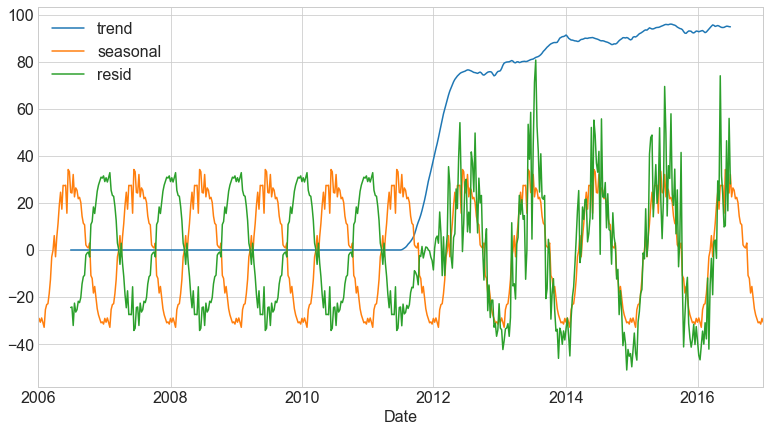

In [112]:
decomposition.iloc[:, 1:].plot()


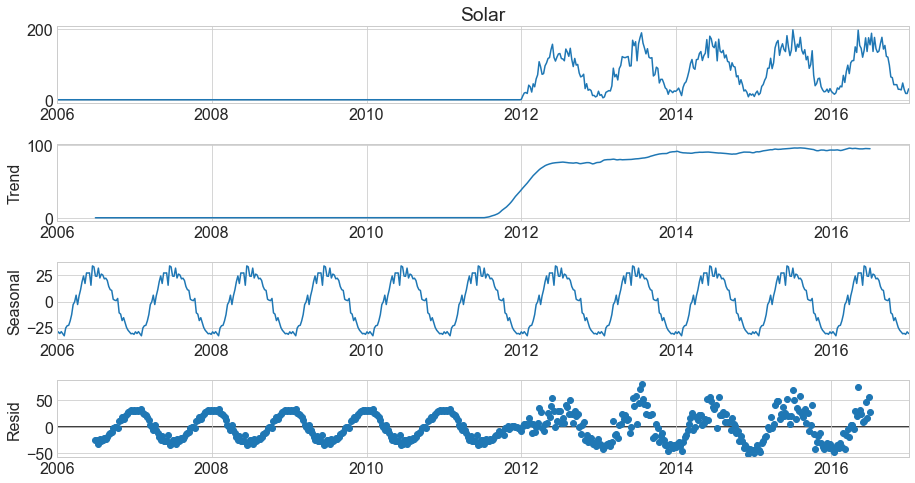

In [113]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

<AxesSubplot:xlabel='month', ylabel='Consumption'>

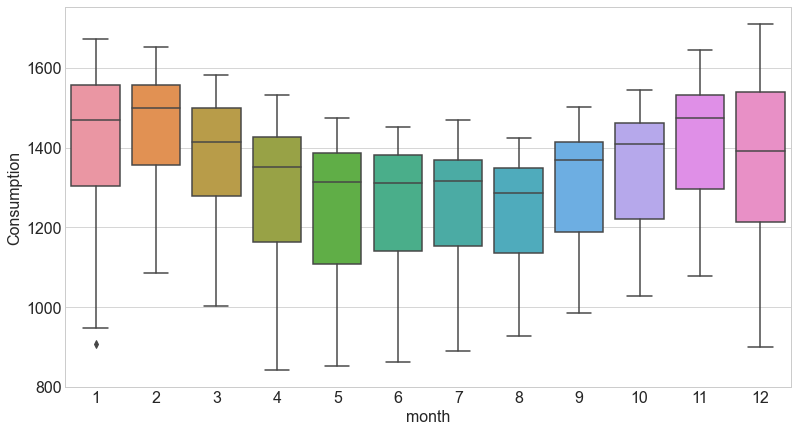

In [114]:
sns.boxplot(data = train, x = 'month', y = 'Consumption')

In [116]:
train.Wind

Date
2006-01-01      0.000
2006-01-02      0.000
2006-01-03      0.000
2006-01-04      0.000
2006-01-05      0.000
               ...   
2016-12-27    640.895
2016-12-28    214.990
2016-12-29    167.698
2016-12-30    239.257
2016-12-31    315.063
Name: Wind, Length: 4018, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Wind'>

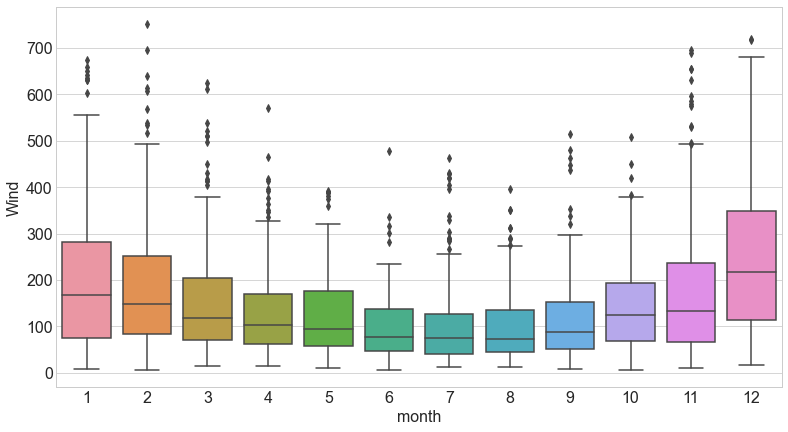

In [118]:
sns.boxplot(data = train[train.Wind>0], x = 'month', y = 'Wind')

<AxesSubplot:xlabel='month', ylabel='Solar'>

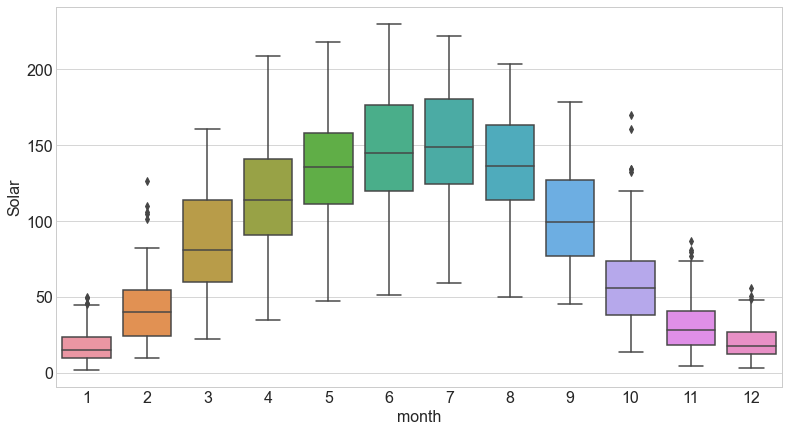

In [124]:
sns.boxplot(data = train[train.Solar>0], x = 'month', y = 'Solar')